In [1]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

In [5]:
# 1. 데이터 불러오기
df = pd.read_csv("C:/Users/LG/OneDrive/문서/GitHub/KBO_Prediction_ML/data/real_final.csv")  # 경로는 필요에 따라 수정하세요

In [6]:
# 2. 결측치 확인
print(df.isnull().sum())

GameDate              0
home_Team             0
away_Team             0
Result                0
home_Recent_5_Win     0
home_Recent_5_Loss    0
home_OPS              0
home_BB               0
home_HBP              0
home_SO               0
home_ERA              0
home_BB_p             0
home_K                0
home_IR               0
home_IS               0
home_TBF              0
away_OPS              0
away_BB               0
away_HBP              0
away_SO               0
away_ERA              0
away_BB_p             0
away_K                0
away_IR               0
away_IS               0
away_TBF              0
dtype: int64


In [7]:
# 3. feature와 label 나누기
df = df.drop(columns=['GameDate'])
X = df.drop(columns=['Result'])
y = df['Result']

In [8]:
# 4. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [ ]:
# 5. 하이퍼파라미터 그리드 설정 및 GridSearchCV로 최적화
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=3)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("최적 파라미터:", grid_search.best_params_)
best_model = grid_search.best_estimator_

최적 파라미터: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [17]:
# 6. 학습 데이터 정확도, 테스트 데이터 정확도 및 AUC 계산
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_proba = best_model.predict_proba(X_test)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Train Accuracy: 0.9975
Test Accuracy: 0.8656
Train AUC: 1.0000
Test AUC: 0.9356


In [12]:
# 7. 상세 분류 리포트 출력 (테스트 데이터 기준)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       294
           1       0.88      0.86      0.87       316

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610



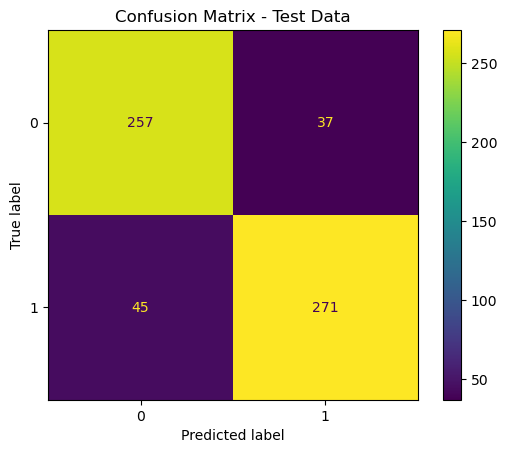

In [13]:
# 8. Confusion Matrix 시각화
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix - Test Data")
plt.show()

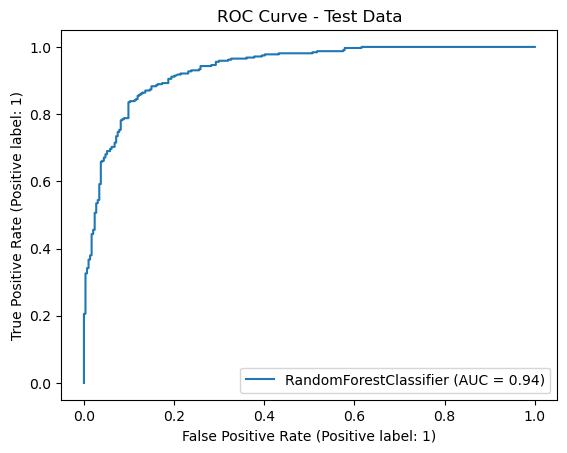

In [14]:
# 9. ROC Curve 시각화
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve - Test Data")
plt.show()

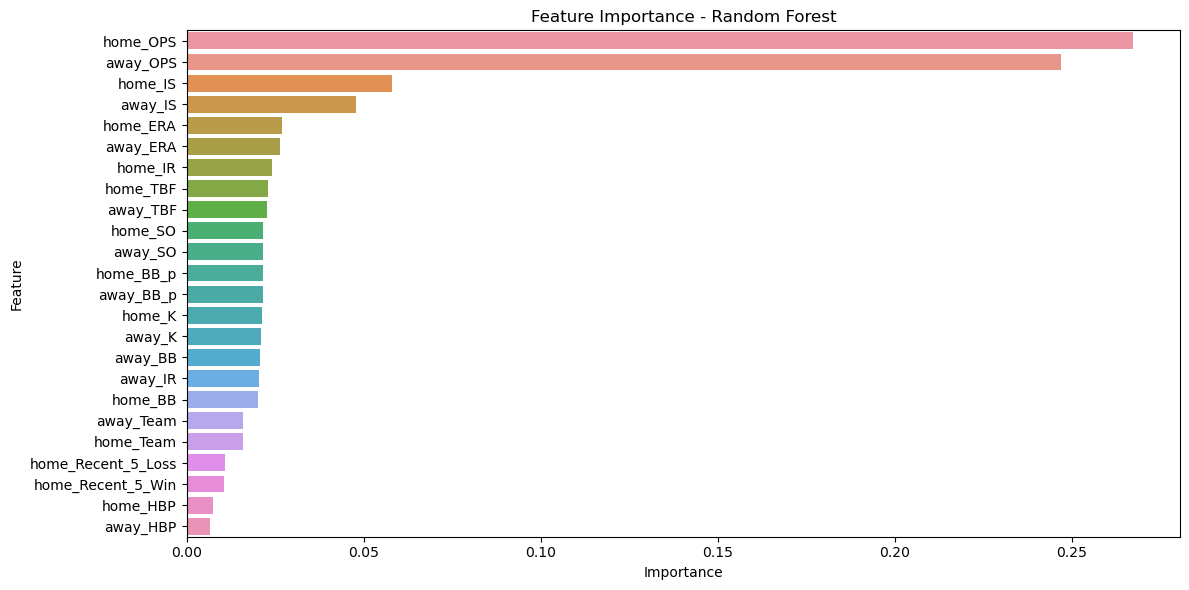

In [15]:
# 10. Feature Importance 시각화
importances = best_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
# 11. 모델 저장
joblib.dump(best_model, 'best_random_forest_model.pkl')
print("모델이 'best_random_forest_model.pkl' 파일로 저장되엇습니다.")

모델이 'best_random_forest_model.pkl' 파일로 저장되었습니다.
